In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd



In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

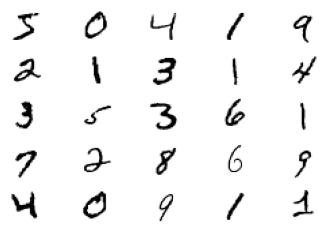

In [4]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [5]:
#clear Keras
K.clear_session()

In [6]:
X, y = make_moons(500, noise=0.1)

In [7]:
m = Sequential([
    # hidden layer, as the very first layer
    Dense(4, input_shape = (2,)), # the shape of ONE observation i.e. the number of features
    Activation('relu'),
    # output layer
    Dense(1), 
    Activation('sigmoid')
])

In [8]:
# build the computation graph
m.compile(optimizer='rmsprop',
          loss='binary_crossentropy',
          metrics=['accuracy'])

In [9]:
# print all layers
print(m.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# train the model
h  = m.fit(X, y, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 18ms/step - loss: 0.5995 - accuracy: 0.7675 - val_loss: 0.6040 - val_accuracy: 0.7400
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5925 - accuracy: 0.7675 - val_loss: 0.5985 - val_accuracy: 0.7400
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5870 - accuracy: 0.7675 - val_loss: 0.5935 - val_accuracy: 0.7300
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5821 - accuracy: 0.7675 - val_loss: 0.5889 - val_accuracy: 0.7400
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5774 - accuracy: 0.7675 - val_loss: 0.5844 - val_accuracy: 0.7400
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5728 - accuracy: 0.7675 - val_loss: 0.5799 - val_accuracy: 0.7400
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5682 - accuracy: 0.7650 - val_loss: 0.5755 - val_accuracy: 0.7400
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 6ms/step - loss: 0.4095 - accuracy: 0.7750 - val_loss: 0.4348 - val_accuracy: 0.7600
Epoch 60/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4080 - accuracy: 0.7750 - val_loss: 0.4334 - val_accuracy: 0.7600
Epoch 61/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4063 - accuracy: 0.7775 - val_loss: 0.4319 - val_accuracy: 0.7600
Epoch 62/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4047 - accuracy: 0.7775 - val_loss: 0.4305 - val_accuracy: 0.7600
Epoch 63/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4030 - accuracy: 0.7775 - val_loss: 0.4291 - val_accuracy: 0.7600
Epoch 64/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4014 - accuracy: 0.7775 - val_loss: 0.4276 - val_accuracy: 0.7600
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3999 - accuracy: 0.7800 - val_loss: 0.4263 - val_accuracy: 0.7600
Epoch 66/100
8/8 [===============

In [11]:
#h.history['loss'].shape
#h.history['val_loss'].shape

In [12]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

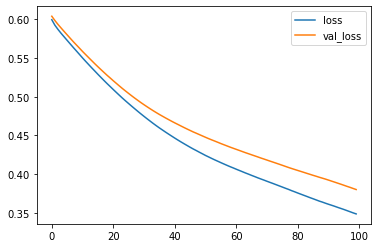

In [13]:
# plot the learning curve
plt.plot(h.history['loss'], label = 'loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()

In [14]:
score = m.evaluate(X, y, batch_size=50)
print(score)

10/10 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8180
[0.3540339171886444, 0.8180000185966492]


In [15]:
# prediction on new data points
print(m.predict(X[:10]))

[[0.0329099 ]
 [0.16662829]
 [0.43377787]
 [0.0290077 ]
 [0.8903843 ]
 [0.3678792 ]
 [0.2932722 ]
 [0.0568871 ]
 [0.02497632]
 [0.18740816]]


In [16]:
m.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
# load, create and compile model

network = load_model("model.h5")
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [18]:
# save a list of np.arrays with the weights
w = network.get_weights()

In [19]:
# see the underlying TensorFlow variables
network.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.9526661 , -0.31256294, -1.1522266 , -0.86276066],
        [-1.2117782 , -0.49504486,  0.0412681 ,  0.7455633 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.43241227, -0.48638114, -0.02922932,  0.30092922], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[ 1.0978403e+00],
        [ 1.2366395e-03],
        [-1.3382772e+00],
        [-1.5232240e+00]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.2090003], dtype=float32)>]

In [20]:
# extract the names of the TF variables
[v.name for v in network.weights]

['dense/kernel:0', 'dense/bias:0', 'dense_1/kernel:0', 'dense_1/bias:0']

In [29]:
w[0].shape

(2, 4)

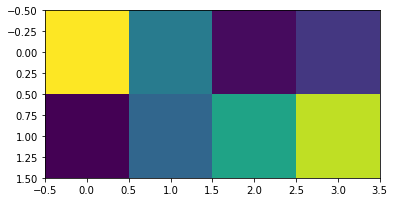

In [32]:
# plot weights of one layer (for MNIST)

plt.imshow(w[0]) #.reshape((28, 28))
plt.show()

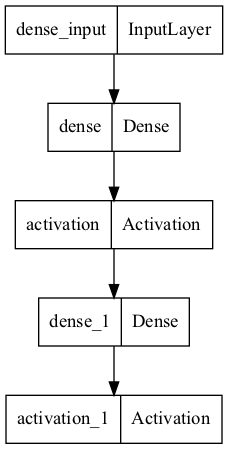

In [24]:
plot_model(network,
   to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)